<a href="https://colab.research.google.com/github/shumshersubashgautam/2MobileNetV2-BreastCancer/blob/master/Reinforcementlearningincolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#installing dependencies
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'


In [3]:
import gym
import numpy as np
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()
#env.render()
print('initial observation:', obs)

action = env.action_space.sample()
obs, r, done, info = env.step(action)
print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

observation space: Box(4,)
action space: Discrete(2)
initial observation: [0.01522668 0.03130924 0.03453029 0.0238955 ]
next observation: [ 0.01585287  0.22591942  0.0350082  -0.25769586]
reward: 1.0
done: False
info: {}


In [4]:
# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


test episode: 0 R: 11.0
test episode: 1 R: 28.0
test episode: 2 R: 24.0


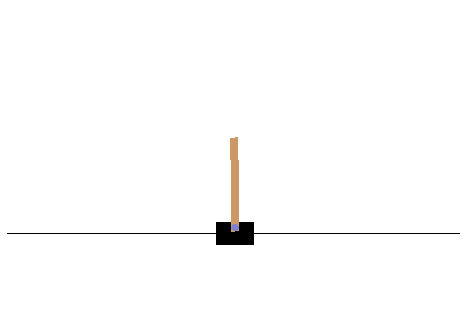

In [5]:
frames = []
for i in range(3):
    obs = env.reset()
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        frames.append(env.render(mode = 'rgb_array'))
        obs, r, done, _ = env.step(env.action_space.sample())
        R += r
        t += 1
    print('test episode:', i, 'R:', R)
 
env.render()

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

In [6]:
# wrap env for recording video
envw = gym.wrappers.Monitor(env, "./", force=True)

for i in range(3):
    obs = envw.reset()
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        envw.render()
        obs, r, done, _ = envw.step(env.action_space.sample())
        R += r
        t += 1
    print('test episode:', i, 'R:', R)

test episode: 0 R: 29.0
test episode: 1 R: 19.0
test episode: 2 R: 15.0


In [0]:
#saving video
from google.colab import files
import glob

for file in glob.glob("openaigym.video.*.mp4"):
  files.download(file)

In [0]:
#remove video to free memory
!rm openaigym.video.*

In [0]:
import gym
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use('ggplot')

In [0]:
env = gym.make('Blackjack-v0')

In [0]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [0]:
def generate_episode(policy, env):
    
    # we initialize the list for storing states, actions, and rewards
    states, actions, rewards = [], [], []
    
    # Initialize the gym environment
    observation = env.reset()
    
    while True:
        
        # append the states to the states list
        states.append(observation)
        
        # now, we select an action using our sample_policy function and append the action to actions list
         
        action = sample_policy(observation)
        actions.append(action)
        
        # We perform the action in the environment according to our sample_policy, move to the next state 
        # and receive reward
        observation, reward, done, info = env.step(action)
        rewards.append(reward)
        
        # Break if the state is a terminal state
        if done:
             break
                
    return states, actions, rewards

In [0]:
def first_visit_mc_prediction(policy, env, n_episodes):
    
    # First, we initialize the empty value table as a dictionary for storing the values of each state
    value_table = defaultdict(float)
    N = defaultdict(int)

    
    for _ in range(n_episodes):
        
        # Next, we generate the epsiode and store the states and rewards
        states, _, rewards = generate_episode(policy, env)
        returns = 0
        
        # Then for each step, we store the rewards to a variable R and states to S, and we calculate
        # returns as a sum of rewards
        
        for t in range(len(states) - 1, -1, -1):
            R = rewards[t]
            S = states[t]
            
            returns += R
            
            # Now to perform first visit MC, we check if the episode is visited for the first time, if yes,
            # we simply take the average of returns and assign the value of the state as an average of returns
            
            if S not in states[:t]:
                N[S] += 1
                value_table[S] += (returns - value_table[S]) / N[S]
    
    return value_table

In [0]:
value = first_visit_mc_prediction(sample_policy, env, n_episodes=500000)

In [15]:
for i in range(10):
  print(value.popitem())

((5, 2, False), -0.5202702702702705)
((12, 8, True), -0.2912621359223301)
((6, 7, False), -0.548158640226629)
((13, 1, True), -0.46850393700787385)
((4, 3, False), -0.48672566371681464)
((14, 2, True), -0.3186003683241251)
((13, 8, True), -0.27272727272727265)
((12, 9, True), -0.22222222222222227)
((14, 8, True), -0.28542914171656686)
((13, 6, True), -0.3199152542372878)


In [0]:
def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21 + 1)
    dealer_show = np.arange(1, 10 + 1)
    usable_ace = np.array([False, True])
    state_values = np.zeros((len(player_sum), len(dealer_show), len(usable_ace)))

    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                state_values[i, j, k] = V[player, dealer, ace]
    
    X, Y = np.meshgrid(player_sum, dealer_show)
 
    ax1.plot_wireframe(X, Y, state_values[:, :, 0])
    ax2.plot_wireframe(X, Y, state_values[:, :, 1])
 
    for ax in ax1, ax2:
        ax.set_zlim(-1, 1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer showing')
        ax.set_zlabel('state-value')

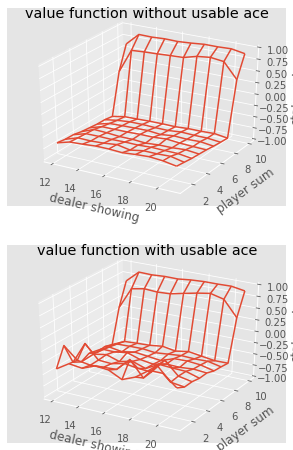

In [17]:
fig, axes = pyplot.subplots(nrows=2, figsize=(5, 8),
subplot_kw={'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value, axes[0], axes[1])

In [18]:
import numpy as np
import gym
import tensorflow as tf
from tensorflow.contrib.layers import flatten, conv2d, fully_connected
from collections import deque, Counter
import random
from datetime import datetime

In [0]:
color = np.array([210, 164, 74]).mean()

def preprocess_observation(obs):

    # Crop and resize the image
    img = obs[1:176:2, ::2]

    # Convert the image to greyscale
    img = img.mean(axis=2)

    # Improve image contrast
    img[img==color] = 0

    # Next we normalize the image from -1 to +1
    img = (img - 128) / 128 - 1

    return img.reshape(88,80,1)

In [0]:
env = gym.make("MsPacman-v0")
n_outputs = env.action_space.n

In [0]:
tf.reset_default_graph()

def q_network(X, name_scope):
    
    # Initialize layers
    initializer = tf.contrib.layers.variance_scaling_initializer()

    with tf.variable_scope(name_scope) as scope: 

        # initialize the convolutional layers
        layer_1 = conv2d(X, num_outputs=32, kernel_size=(8,8), stride=4, padding='SAME', weights_initializer=initializer) 
        tf.summary.histogram('layer_1',layer_1)
        
        layer_2 = conv2d(layer_1, num_outputs=64, kernel_size=(4,4), stride=2, padding='SAME', weights_initializer=initializer)
        tf.summary.histogram('layer_2',layer_2)
        
        layer_3 = conv2d(layer_2, num_outputs=64, kernel_size=(3,3), stride=1, padding='SAME', weights_initializer=initializer)
        tf.summary.histogram('layer_3',layer_3)
        
        # Flatten the result of layer_3 before feeding to the fully connected layer
        flat = flatten(layer_3)

        fc = fully_connected(flat, num_outputs=128, weights_initializer=initializer)
        tf.summary.histogram('fc',fc)
        
        output = fully_connected(fc, num_outputs=n_outputs, activation_fn=None, weights_initializer=initializer)
        tf.summary.histogram('output',output)
        

        # Vars will store the parameters of the network such as weights
        vars = {v.name[len(scope.name):]: v for v in tf.get_collection(key=tf.GraphKeys.TRAINABLE_VARIABLES, scope=scope.name)} 
        return vars, output

In [0]:
epsilon = 0.5
eps_min = 0.05
eps_max = 1.0
eps_decay_steps = 500000

def epsilon_greedy(action, step):
    p = np.random.random(1).squeeze()
    epsilon = max(eps_min, eps_max - (eps_max-eps_min) * step/eps_decay_steps)
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        return action

In [0]:
buffer_len = 20000
exp_buffer = deque(maxlen=buffer_len)

In [0]:
def sample_memories(batch_size):
    perm_batch = np.random.permutation(len(exp_buffer))[:batch_size]
    mem = np.array(exp_buffer)[perm_batch]
    return mem[:,0], mem[:,1], mem[:,2], mem[:,3], mem[:,4]

In [0]:
num_episodes = 800
batch_size = 48
input_shape = (None, 88, 80, 1)
learning_rate = 0.001
X_shape = (None, 88, 80, 1)
discount_factor = 0.97

global_step = 0
copy_steps = 100
steps_train = 4
start_steps = 2000

In [0]:
logdir = 'logs'
tf.reset_default_graph()

# Now we define the placeholder for our input i.e game state
X = tf.placeholder(tf.float32, shape=X_shape)

# we define a boolean called in_training_model to toggle the training
in_training_mode = tf.placeholder(tf.bool)

In [28]:
# we build our Q network, which takes the input X and generates Q values for all the actions in the state
mainQ, mainQ_outputs = q_network(X, 'mainQ')

# similarly we build our target Q network
targetQ, targetQ_outputs = q_network(X, 'targetQ')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.


In [29]:
# define the placeholder for our action values
X_action = tf.placeholder(tf.int32, shape=(None,))
Q_action = tf.reduce_sum(targetQ_outputs * tf.one_hot(X_action, n_outputs), axis=-1, keep_dims=True)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
copy_op = [tf.assign(main_name, targetQ[var_name]) for var_name, main_name in mainQ.items()]
copy_target_to_main = tf.group(*copy_op)

In [0]:
# define a placeholder for our output i.e action
y = tf.placeholder(tf.float32, shape=(None,1))

# now we calculate the loss which is the difference between actual value and predicted value
loss = tf.reduce_mean(tf.square(y - Q_action))

# we use adam optimizer for minimizing the loss
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

loss_summary = tf.summary.scalar('LOSS', loss)
merge_summary = tf.summary.merge_all()
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [0]:
with tf.Session() as sess:
    init.run()
    
    # for each episode
    for i in range(num_episodes):
        done = False
        obs = env.reset()
        epoch = 0
        episodic_reward = 0
        actions_counter = Counter() 
        episodic_loss = []

        # while the state is not the terminal state
        while not done:

           #env.render()
        
            # get the preprocessed game screen
            obs = preprocess_observation(obs)

            # feed the game screen and get the Q values for each action
            actions = mainQ_outputs.eval(feed_dict={X:[obs], in_training_mode:False})

            # get the action
            action = np.argmax(actions, axis=-1)
            actions_counter[str(action)] += 1 

            # select the action using epsilon greedy policy
            action = epsilon_greedy(action, global_step)
            
            # now perform the action and move to the next state, next_obs, receive reward
            next_obs, reward, done, _ = env.step(action)

            # Store this transistion as an experience in the replay buffer
            exp_buffer.append([obs, action, preprocess_observation(next_obs), reward, done])
            
            # After certain steps, we train our Q network with samples from the experience replay buffer
            if global_step % steps_train == 0 and global_step > start_steps:
                
                # sample experience
                o_obs, o_act, o_next_obs, o_rew, o_done = sample_memories(batch_size)

                # states
                o_obs = [x for x in o_obs]

                # next states
                o_next_obs = [x for x in o_next_obs]

                # next actions
                next_act = mainQ_outputs.eval(feed_dict={X:o_next_obs, in_training_mode:False})


                # reward
                y_batch = o_rew + discount_factor * np.max(next_act, axis=-1) * (1-o_done) 

                # merge all summaries and write to the file
                mrg_summary = merge_summary.eval(feed_dict={X:o_obs, y:np.expand_dims(y_batch, axis=-1), X_action:o_act, in_training_mode:False})
                file_writer.add_summary(mrg_summary, global_step)

                # now we train the network and calculate loss
                train_loss, _ = sess.run([loss, training_op], feed_dict={X:o_obs, y:np.expand_dims(y_batch, axis=-1), X_action:o_act, in_training_mode:True})
                episodic_loss.append(train_loss)
            
            # after some interval we copy our main Q network weights to target Q network
            if (global_step+1) % copy_steps == 0 and global_step > start_steps:
                copy_target_to_main.run()
                
            obs = next_obs
            epoch += 1
            global_step += 1
            episodic_reward += reward
        
        print('Epoch', epoch, 'Reward', episodic_reward,)

Epoch 696 Reward 250.0
Epoch 599 Reward 200.0
Epoch 736 Reward 240.0
Epoch 700 Reward 260.0
Epoch 618 Reward 150.0
Epoch 849 Reward 590.0
Epoch 679 Reward 300.0
Epoch 441 Reward 160.0
Epoch 718 Reward 270.0
Epoch 618 Reward 200.0
Epoch 632 Reward 230.0
Epoch 662 Reward 190.0
Epoch 881 Reward 680.0
Epoch 728 Reward 330.0
Epoch 684 Reward 270.0
Epoch 643 Reward 200.0
Epoch 690 Reward 240.0
Epoch 597 Reward 190.0
Epoch 637 Reward 220.0
Epoch 759 Reward 320.0
Epoch 532 Reward 160.0
Epoch 758 Reward 250.0
Epoch 675 Reward 230.0
Epoch 625 Reward 250.0
Epoch 648 Reward 240.0
Epoch 729 Reward 280.0
Epoch 732 Reward 230.0
Epoch 703 Reward 210.0
Epoch 638 Reward 180.0
Epoch 608 Reward 160.0
Epoch 646 Reward 200.0
Epoch 712 Reward 160.0
Epoch 566 Reward 300.0


KeyboardInterrupt: ignored